In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import networkx as nx
sns.set(style="whitegrid")
pd.set_option("display.max_columns" , None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [2]:
import heapq
from collections import defaultdict
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#from surprise import Dataset, Reader, KNNBasic
#from surprise.model_selection import train_test_split

In [3]:
df = pd.read_csv('CatalogCrossSell.csv')

In [4]:
# checking some records
df.head()

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,11569,0,1,1,1,1,0,0,1,0
1,13714,0,1,1,1,1,0,1,1,1
2,46391,0,1,1,1,1,0,1,1,1
3,67264,0,0,1,1,1,0,1,1,0
4,67363,0,0,1,0,1,0,1,1,0


In [5]:
# variables and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Customer Number                4998 non-null   int64
 1   Clothing Division              4998 non-null   int64
 2   Housewares Division            4998 non-null   int64
 3   Health Products Division       4998 non-null   int64
 4   Automotive Division            4998 non-null   int64
 5   Personal Electronics Division  4998 non-null   int64
 6   Computers Division             4998 non-null   int64
 7   Garden Division                4998 non-null   int64
 8   Novelty Gift Division          4998 non-null   int64
 9   Jewelry Division               4998 non-null   int64
dtypes: int64(10)
memory usage: 390.6 KB


In [6]:
df.astype('object').describe(include='all').loc['unique', :]

Customer Number                  4998
Clothing Division                   2
Housewares Division                 2
Health Products Division            1
Automotive Division                 2
Personal Electronics Division       2
Computers Division                  2
Garden Division                     2
Novelty Gift Division               2
Jewelry Division                    2
Name: unique, dtype: int64

In [7]:
df.drop(['Customer Number'],axis= 1, inplace=True)

In [8]:

# most popular items
count = df.loc[:,:].sum()
count_df=count.to_frame().reset_index(drop=False)
count_df.columns
count_df.rename(columns={'index':'item', 0:'count'}, inplace=True)

In [9]:
count_df

,item,count
0,Clothing Division,165
1,Housewares Division,1967
2,Health Products Division,4998
3,Automotive Division,674
4,Personal Electronics Division,2336
5,Computers Division,234
6,Garden Division,1360
7,Novelty Gift Division,1137
8,Jewelry Division,1784


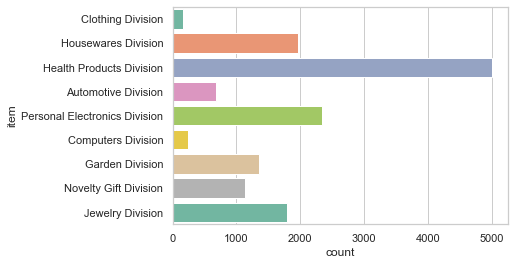

In [10]:
sns.barplot('count','item',data=count_df, palette='Set2');

Health Products Division in all rows , we can exclude this and check support for other product. 


In [11]:
df.drop(['Health Products Division'],axis=1, inplace=True)

# Association with min_support 0.01

In [12]:
# create frequent itemsets
itemsets = apriori(df, min_support=0.01, use_colnames=True)
itemsets['length'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets

,support,itemsets,length
0,0.033013,(Clothing Division),1
1,0.393557,(Housewares Division),1
2,0.134854,(Automotive Division),1
3,0.467387,(Personal Electronics Division),1
4,0.046819,(Computers Division),1
...,...,...,...
86,0.021809,"(Novelty Gift Division, Personal Electronics Division, Jewelry Division, Automotive Division, Housewares Division)",5
87,0.019208,"(Novelty Gift Division, Garden Division, Jewelry Division, Automotive Division, Housewares Division)",5
88,0.038215,"(Novelty Gift Division, Personal Electronics Division, Garden Division, Jewelry Division, Housewares Division)",5
89,0.024010,"(Novelty Gift Division, Personal Electronics Division, Garden Division, Jewelry Division, Automotive Division)",5


In [13]:
itemsets[ (itemsets['length'] == 2) &
                   (itemsets['support'] >= 0.05) ]

,support,itemsets,length
13,0.067627,"(Automotive Division, Housewares Division)",2
14,0.235494,"(Housewares Division, Personal Electronics Division)",2
16,0.132853,"(Housewares Division, Garden Division)",2
17,0.134854,"(Novelty Gift Division, Housewares Division)",2
18,0.194878,"(Jewelry Division, Housewares Division)",2
19,0.083033,"(Automotive Division, Personal Electronics Division)",2
20,0.085434,"(Automotive Division, Garden Division)",2
21,0.055622,"(Novelty Gift Division, Automotive Division)",2
22,0.075230,"(Jewelry Division, Automotive Division)",2
24,0.163265,"(Personal Electronics Division, Garden Division)",2


In [14]:
itemsets[ (itemsets['length'] == 3) &
                   (itemsets['support'] >= 0.05) ]

,support,itemsets,length
37,0.050420,"(Automotive Division, Housewares Division, Personal Electronics Division)",3
42,0.098439,"(Housewares Division, Personal Electronics Division, Garden Division)",3
43,0.107843,"(Novelty Gift Division, Housewares Division, Personal Electronics Division)",3
44,0.132053,"(Jewelry Division, Housewares Division, Personal Electronics Division)",3
48,0.068828,"(Novelty Gift Division, Housewares Division, Garden Division)",3
49,0.080232,"(Jewelry Division, Housewares Division, Garden Division)",3
50,0.075430,"(Novelty Gift Division, Housewares Division, Jewelry Division)",3
51,0.058023,"(Automotive Division, Personal Electronics Division, Garden Division)",3
53,0.051621,"(Jewelry Division, Automotive Division, Personal Electronics Division)",3
60,0.087235,"(Novelty Gift Division, Personal Electronics Division, Garden Division)",3


In [15]:
# convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
print('Number of rules: ',len(rules))

Number of rules:  206


In [16]:
rules[rules['consequents_length']==1].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
188,"(Novelty Gift Division, Automotive Division, Jewelry Division, Personal Electronics Division)",(Garden Division),0.029412,0.272109,0.024010,0.816327,3.000000,0.016006,3.962963,4,1
142,"(Novelty Gift Division, Automotive Division, Jewelry Division)",(Garden Division),0.034214,0.272109,0.027811,0.812865,2.987281,0.018501,3.889668,3,1
131,"(Novelty Gift Division, Automotive Division, Personal Electronics Division)",(Garden Division),0.044418,0.272109,0.035414,0.797297,2.930068,0.023328,3.590930,3,1
175,"(Novelty Gift Division, Automotive Division, Jewelry Division, Housewares Division)",(Garden Division),0.024210,0.272109,0.019208,0.793388,2.915702,0.012620,3.522993,4,1
58,"(Novelty Gift Division, Automotive Division)",(Garden Division),0.055622,0.272109,0.044018,0.791367,2.908273,0.028882,3.488858,2,1
...,...,...,...,...,...,...,...,...,...,...,...
3,(Automotive Division),(Housewares Division),0.134854,0.393557,0.067627,0.501484,1.274233,0.014554,1.216495,1,1
32,"(Computers Division, Housewares Division)",(Personal Electronics Division),0.031613,0.467387,0.018207,0.575949,1.232275,0.003432,1.256013,2,1
15,(Jewelry Division),(Personal Electronics Division),0.356943,0.467387,0.197479,0.553251,1.183711,0.030649,1.192198,1,1
66,"(Computers Division, Jewelry Division)",(Personal Electronics Division),0.029612,0.467387,0.016206,0.547297,1.170973,0.002366,1.176518,2,1


According to above table, the customers who bought (Personal Electronics Division, Jewelry Division, Novelty Gift Division, Automotive Division) is expected to buy (Garden Division) with a likelihood of 80% (confidence). Lift & conviction scores support that hypothesis too
It would be better to keep them close to increase sales !

Customers who bought (Automotive Division) is expected to buy (Housewares Division) with a likelihood of 50% (confidence).

In [17]:
# print antecedents with length 2
rules[rules["antecedents_length"]==2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
17,"(Housewares Division, Clothing Division)",(Personal Electronics Division),0.024010,0.467387,0.016407,0.683333,1.462029,0.005185,1.681936,2,1
18,"(Personal Electronics Division, Clothing Division)",(Housewares Division),0.019808,0.393557,0.016407,0.828283,2.104605,0.008611,3.531636,2,1
19,"(Novelty Gift Division, Clothing Division)",(Housewares Division),0.012805,0.393557,0.010204,0.796875,2.024800,0.005165,2.985563,2,1
20,"(Jewelry Division, Clothing Division)",(Housewares Division),0.020008,0.393557,0.016206,0.810000,2.058149,0.008332,3.191803,2,1
21,"(Housewares Division, Clothing Division)",(Jewelry Division),0.024010,0.356943,0.016206,0.675000,1.891059,0.007636,1.978638,2,1
...,...,...,...,...,...,...,...,...,...,...,...
119,"(Novelty Gift Division, Garden Division)","(Housewares Division, Personal Electronics Division)",0.112245,0.235494,0.057623,0.513369,2.179964,0.031190,1.571017,2,2
126,"(Novelty Gift Division, Jewelry Division)","(Housewares Division, Personal Electronics Division)",0.107243,0.235494,0.063625,0.593284,2.519313,0.038370,1.879702,2,2
134,"(Novelty Gift Division, Automotive Division)","(Personal Electronics Division, Garden Division)",0.055622,0.163265,0.035414,0.636691,3.899730,0.026333,2.303092,2,2
141,"(Novelty Gift Division, Automotive Division)","(Jewelry Division, Personal Electronics Division)",0.055622,0.197479,0.029412,0.528777,2.677637,0.018428,1.703060,2,2


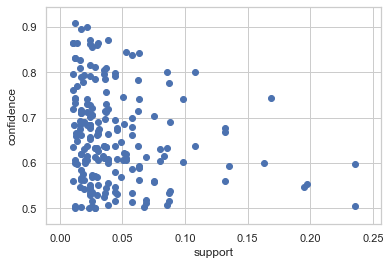

In [18]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

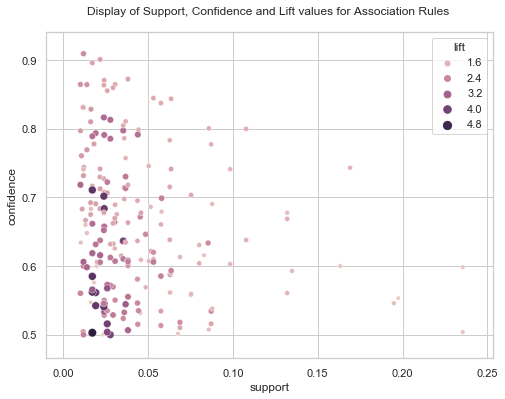

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = rules['support'], y = rules['confidence'], hue = rules['lift'], size = rules['lift'])
plt.title('Display of Support, Confidence and Lift values for Association Rules \n')

plt.show()

In [20]:
rules_1=rules[rules["antecedents"].str.contains("Personal Electronics Division", regex=False) & (rules["antecedents_length"] == 2)].sort_values("confidence", ascending=False).head(10)

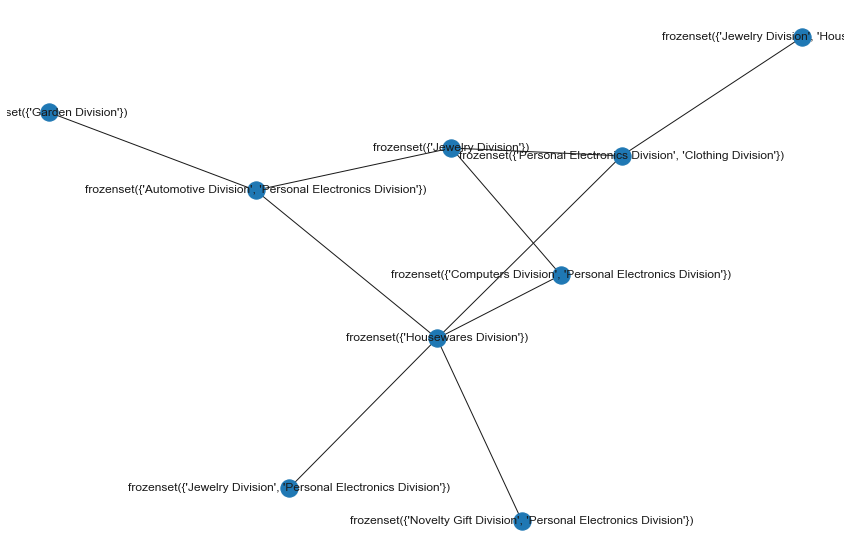

In [21]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

 From above graph, we can clearly see that Personal Electronics Division along with automotive,and computer division corresponds to Jewelry Division, or Housewares Division

In [22]:
rules_1=rules[rules["antecedents"].str.contains("Automotive Division", regex=False) & (rules["antecedents_length"] == 1)].sort_values("confidence", ascending=False).head(10)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
10,(Automotive Division),(Garden Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229,1,1
9,(Automotive Division),(Personal Electronics Division),0.134854,0.467387,0.083033,0.615727,1.317382,0.020004,1.386028,1,1
11,(Automotive Division),(Jewelry Division),0.134854,0.356943,0.075230,0.557864,1.562893,0.027095,1.454431,1,1
3,(Automotive Division),(Housewares Division),0.134854,0.393557,0.067627,0.501484,1.274233,0.014554,1.216495,1,1


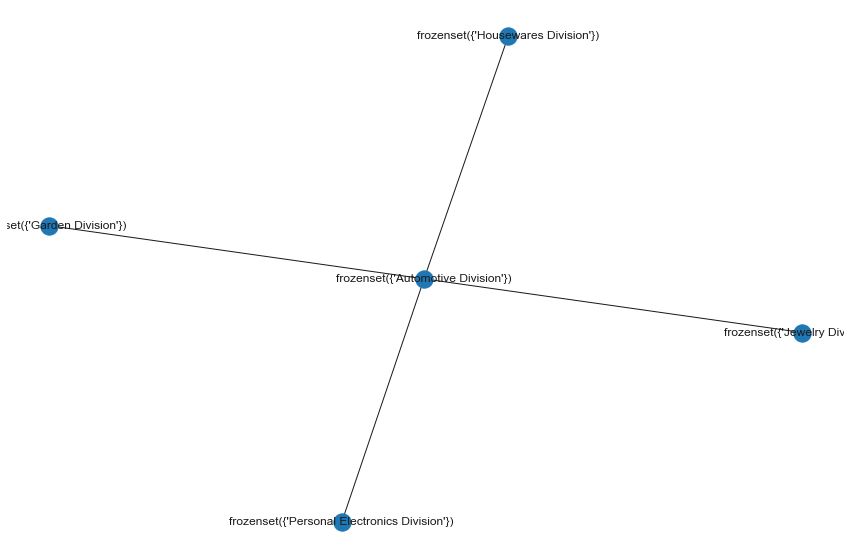

In [23]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

Automotive Division is one which corresponds to other divisions, so a better option is to place Garden division catalog with 60% confidence and lift of 2.32, so it's more likely to catch the customer when automotive division product is being sold


In [24]:
rules_1=rules[rules["antecedents"].str.contains("Housewares Division", regex=False) & (rules["antecedents_length"] == 2)].sort_values("confidence", ascending=False).head(10)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
36,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120,2,1
24,"(Automotive Division, Housewares Division)",(Personal Electronics Division),0.067627,0.467387,0.050420,0.745562,1.595171,0.018812,2.093293,2,1
34,"(Housewares Division, Garden Division)",(Personal Electronics Division),0.132853,0.467387,0.098439,0.740964,1.585333,0.036346,2.056134,2,1
43,"(Computers Division, Housewares Division)",(Jewelry Division),0.031613,0.356943,0.021609,0.683544,1.914997,0.010325,2.032061,2,1
17,"(Housewares Division, Clothing Division)",(Personal Electronics Division),0.024010,0.467387,0.016407,0.683333,1.462029,0.005185,1.681936,2,1
38,"(Jewelry Division, Housewares Division)",(Personal Electronics Division),0.194878,0.467387,0.132053,0.677618,1.449801,0.040969,1.652118,2,1
31,"(Automotive Division, Housewares Division)",(Jewelry Division),0.067627,0.356943,0.045818,0.677515,1.898105,0.021679,1.994067,2,1
21,"(Housewares Division, Clothing Division)",(Jewelry Division),0.024010,0.356943,0.016206,0.675000,1.891059,0.007636,1.978638,2,1
26,"(Automotive Division, Housewares Division)",(Garden Division),0.067627,0.272109,0.045418,0.671598,2.468121,0.027016,2.216461,2,1
49,"(Housewares Division, Garden Division)",(Jewelry Division),0.132853,0.356943,0.080232,0.603916,1.691912,0.032811,1.623536,2,1


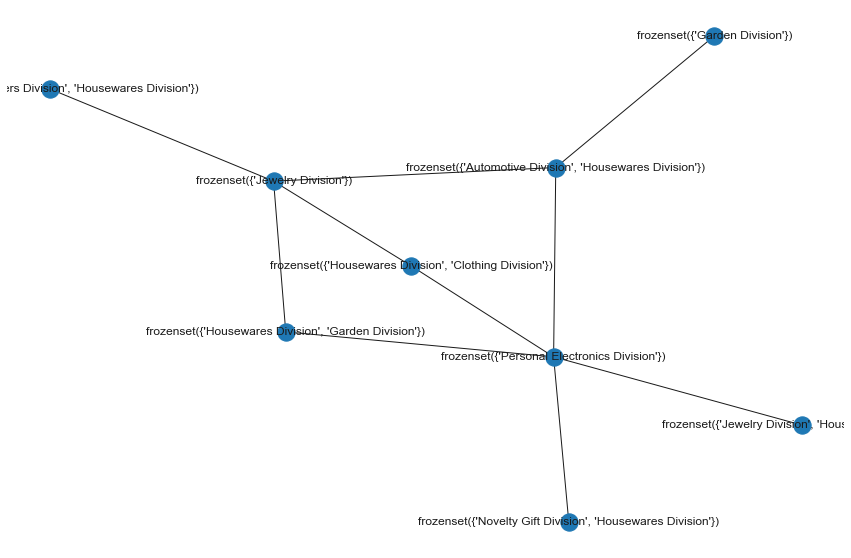

In [25]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

Houseware Division, with other division corresponds to Personal Electronics Division, so placing Personal Electronics Division catalog in Houseware division item shipment will results in more sales of PED items. 

Same way, jewerly division sales can also be increased if placed in Housware Division shipment

In [26]:
rules_1=rules[(rules["antecedents_length"] == 2)].sort_values("confidence", ascending=False).head(10)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
64,"(Computers Division, Novelty Gift Division)",(Personal Electronics Division),0.014206,0.467387,0.011805,0.830986,1.777940,0.005165,3.151294,2,1
42,"(Computers Division, Novelty Gift Division)",(Housewares Division),0.014206,0.393557,0.011805,0.830986,2.111473,0.006214,3.588119,2,1
18,"(Personal Electronics Division, Clothing Division)",(Housewares Division),0.019808,0.393557,0.016407,0.828283,2.104605,0.008611,3.531636,2,1
20,"(Jewelry Division, Clothing Division)",(Housewares Division),0.020008,0.393557,0.016206,0.810000,2.058149,0.008332,3.191803,2,1
73,"(Novelty Gift Division, Jewelry Division)",(Personal Electronics Division),0.107243,0.467387,0.085834,0.800373,1.712442,0.035710,2.668043,2,1
36,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120,2,1
54,"(Novelty Gift Division, Automotive Division)",(Personal Electronics Division),0.055622,0.467387,0.044418,0.798561,1.708565,0.018421,2.644043,2,1
19,"(Novelty Gift Division, Clothing Division)",(Housewares Division),0.012805,0.393557,0.010204,0.796875,2.024800,0.005165,2.985563,2,1
58,"(Novelty Gift Division, Automotive Division)",(Garden Division),0.055622,0.272109,0.044018,0.791367,2.908273,0.028882,3.488858,2,1
33,"(Computers Division, Personal Electronics Division)",(Housewares Division),0.023409,0.393557,0.018207,0.777778,1.976275,0.008994,2.728992,2,1


In [27]:
# High strength rules of Germany country having lift values >= 3 and confidence values >= 50 %
strong_rules = rules_1[(rules_1['lift'] >= 1.2) & (rules_1['confidence'] >= 0.6)]
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
64,"(Computers Division, Novelty Gift Division)",(Personal Electronics Division),0.014206,0.467387,0.011805,0.830986,1.777940,0.005165,3.151294,2,1
42,"(Computers Division, Novelty Gift Division)",(Housewares Division),0.014206,0.393557,0.011805,0.830986,2.111473,0.006214,3.588119,2,1
18,"(Personal Electronics Division, Clothing Division)",(Housewares Division),0.019808,0.393557,0.016407,0.828283,2.104605,0.008611,3.531636,2,1
20,"(Jewelry Division, Clothing Division)",(Housewares Division),0.020008,0.393557,0.016206,0.810000,2.058149,0.008332,3.191803,2,1
73,"(Novelty Gift Division, Jewelry Division)",(Personal Electronics Division),0.107243,0.467387,0.085834,0.800373,1.712442,0.035710,2.668043,2,1
36,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120,2,1
54,"(Novelty Gift Division, Automotive Division)",(Personal Electronics Division),0.055622,0.467387,0.044418,0.798561,1.708565,0.018421,2.644043,2,1
19,"(Novelty Gift Division, Clothing Division)",(Housewares Division),0.012805,0.393557,0.010204,0.796875,2.024800,0.005165,2.985563,2,1
58,"(Novelty Gift Division, Automotive Division)",(Garden Division),0.055622,0.272109,0.044018,0.791367,2.908273,0.028882,3.488858,2,1
33,"(Computers Division, Personal Electronics Division)",(Housewares Division),0.023409,0.393557,0.018207,0.777778,1.976275,0.008994,2.728992,2,1


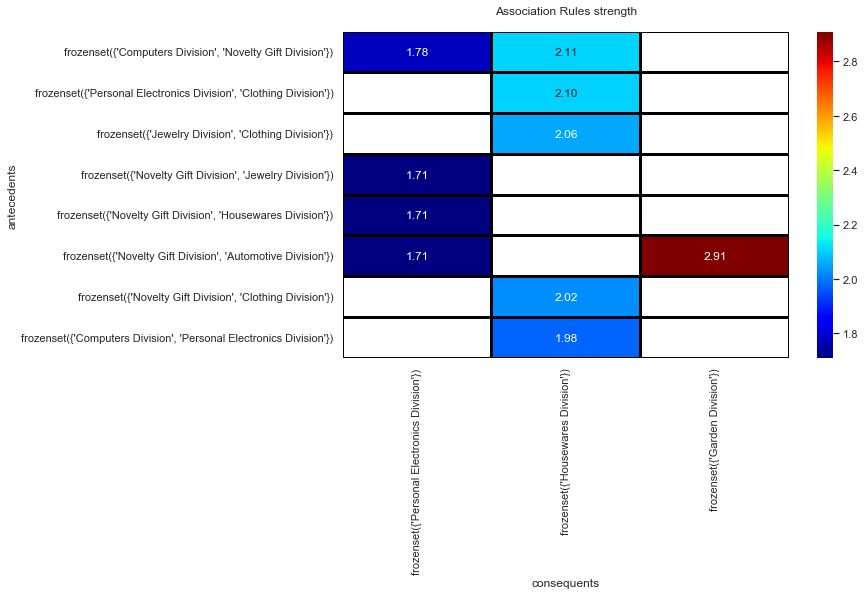

In [28]:
pivot2 = strong_rules.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pivot2, annot = True, fmt = '.2f', linewidths = 2, linecolor = 'black', cmap = 'jet')
plt.title('Association Rules strength\n')
plt.show()

Rules strength are the key to increase the sales of catalog. 
We can use popularity of one item to increase sales of other items. 

Here Personal Electronics Division catalog can be send with Novelty Gift, Computers, Jewelry and Housewares Divisions.

Same way garden division can be send with Automotive division and Novelty Gift Division shipments/email with a lift of 2.91. 


# Association with min support 0.05

In [29]:
# create frequent itemsets
itemsets = apriori(df, min_support=0.05, use_colnames=True)


In [30]:
# convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
print('Number of rules: ',len(rules))

Number of rules:  56


In [31]:
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
55,"(Jewelry Division, Personal Electronics Division, Garden Division)",(Novelty Gift Division),0.087835,0.227491,0.053221,0.605923,2.663501,0.033240,1.960297,3,1
43,"(Housewares Division, Personal Electronics Division, Garden Division)",(Novelty Gift Division),0.098439,0.227491,0.057623,0.585366,2.573139,0.035229,1.863110,3,1
27,"(Automotive Division, Personal Electronics Division)",(Garden Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599,2,1
51,"(Novelty Gift Division, Jewelry Division)","(Housewares Division, Personal Electronics Division)",0.107243,0.235494,0.063625,0.593284,2.519313,0.038370,1.879702,2,2
33,"(Personal Electronics Division, Garden Division)",(Novelty Gift Division),0.163265,0.227491,0.087235,0.534314,2.348725,0.050094,1.658861,2,1
6,(Automotive Division),(Garden Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229,1,1
52,"(Novelty Gift Division, Jewelry Division, Personal Electronics Division)",(Garden Division),0.085834,0.272109,0.053221,0.620047,2.278671,0.029865,1.915738,3,1
22,"(Housewares Division, Garden Division)",(Novelty Gift Division),0.132853,0.227491,0.068828,0.518072,2.277331,0.038605,1.602956,2,1
44,"(Novelty Gift Division, Garden Division)","(Housewares Division, Personal Electronics Division)",0.112245,0.235494,0.057623,0.513369,2.179964,0.031190,1.571017,2,2
38,"(Novelty Gift Division, Jewelry Division)",(Garden Division),0.107243,0.272109,0.063025,0.587687,2.159748,0.033843,1.765383,2,1


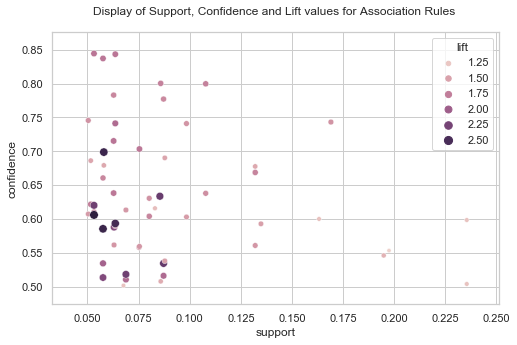

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x = rules['support'], y = rules['confidence'], hue = rules['lift'], size = rules['lift'])
plt.title('Display of Support, Confidence and Lift values for Association Rules \n')

plt.show()

In [33]:
rules_1=rules[(rules["antecedents_length"] == 1)].sort_values("confidence", ascending=False).head(10)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
9,(Novelty Gift Division),(Personal Electronics Division),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908,1,1
6,(Automotive Division),(Garden Division),0.134854,0.272109,0.085434,0.633531,2.328227,0.048739,1.986229,1,1
5,(Automotive Division),(Personal Electronics Division),0.134854,0.467387,0.083033,0.615727,1.317382,0.020004,1.386028,1,1
8,(Garden Division),(Personal Electronics Division),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533,1,1
1,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139,1,1
3,(Novelty Gift Division),(Housewares Division),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255,1,1
7,(Automotive Division),(Jewelry Division),0.134854,0.356943,0.075230,0.557864,1.562893,0.027095,1.454431,1,1
10,(Jewelry Division),(Personal Electronics Division),0.356943,0.467387,0.197479,0.553251,1.183711,0.030649,1.192198,1,1
4,(Jewelry Division),(Housewares Division),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671,1,1
2,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304,1,1


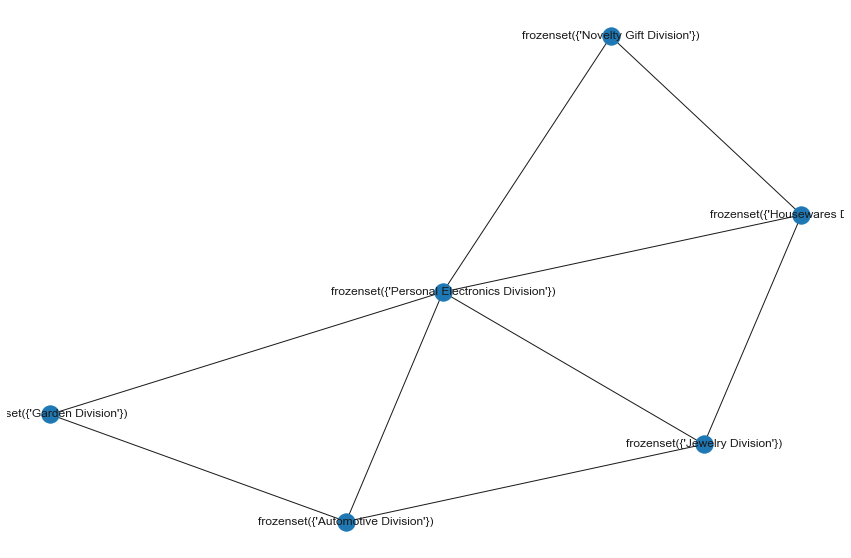

In [34]:
fig, ax=plt.subplots(figsize=(15,10))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

__This graph perfectly explains of the catalog should go with which type of shipment, with a decent lift and confidence above 50%__

In [35]:
rules_1=rules[(rules["antecedents_length"] == 2)].sort_values("confidence", ascending=False).head(10)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
36,"(Novelty Gift Division, Jewelry Division)",(Personal Electronics Division),0.107243,0.467387,0.085834,0.800373,1.712442,0.035710,2.668043,2,1
15,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120,2,1
32,"(Novelty Gift Division, Garden Division)",(Personal Electronics Division),0.112245,0.467387,0.087235,0.777184,1.662827,0.034773,2.390367,2,1
11,"(Automotive Division, Housewares Division)",(Personal Electronics Division),0.067627,0.467387,0.050420,0.745562,1.595171,0.018812,2.093293,2,1
13,"(Housewares Division, Garden Division)",(Personal Electronics Division),0.132853,0.467387,0.098439,0.740964,1.585333,0.036346,2.056134,2,1
26,"(Novelty Gift Division, Jewelry Division)",(Housewares Division),0.107243,0.393557,0.075430,0.703358,1.787181,0.033224,2.044360,2,1
27,"(Automotive Division, Personal Electronics Division)",(Garden Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599,2,1
34,"(Jewelry Division, Garden Division)",(Personal Electronics Division),0.127251,0.467387,0.087835,0.690252,1.476831,0.028360,1.719502,2,1
29,"(Jewelry Division, Automotive Division)",(Personal Electronics Division),0.075230,0.467387,0.051621,0.686170,1.468099,0.016459,1.697140,2,1
28,"(Automotive Division, Garden Division)",(Personal Electronics Division),0.085434,0.467387,0.058023,0.679157,1.453093,0.018092,1.660042,2,1


In [36]:
# High strength rules of Germany country having lift values >= 3 and confidence values >= 50 %
strong_rules = rules_1[(rules['lift'] >= 1.5) & (rules_1['confidence'] >= 0.6)]
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
36,"(Novelty Gift Division, Jewelry Division)",(Personal Electronics Division),0.107243,0.467387,0.085834,0.800373,1.712442,0.035710,2.668043,2,1
15,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120,2,1
32,"(Novelty Gift Division, Garden Division)",(Personal Electronics Division),0.112245,0.467387,0.087235,0.777184,1.662827,0.034773,2.390367,2,1
11,"(Automotive Division, Housewares Division)",(Personal Electronics Division),0.067627,0.467387,0.050420,0.745562,1.595171,0.018812,2.093293,2,1
13,"(Housewares Division, Garden Division)",(Personal Electronics Division),0.132853,0.467387,0.098439,0.740964,1.585333,0.036346,2.056134,2,1
26,"(Novelty Gift Division, Jewelry Division)",(Housewares Division),0.107243,0.393557,0.075430,0.703358,1.787181,0.033224,2.044360,2,1
27,"(Automotive Division, Personal Electronics Division)",(Garden Division),0.083033,0.272109,0.058023,0.698795,2.568072,0.035429,2.416599,2,1


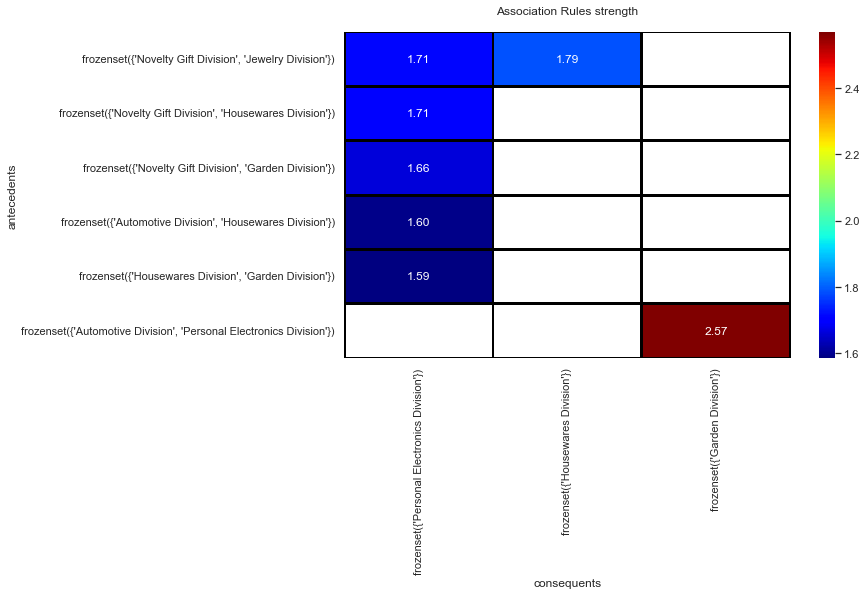

In [37]:
pivot2 = strong_rules.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pivot2, annot = True, fmt = '.2f', linewidths = 2, linecolor = 'black', cmap = 'jet')
plt.title('Association Rules strength\n')
plt.show()

This shows the Garden division catalog can be send with Personal Division and Automotive division shipments,with a lift of 2.57 for a sell being made.

Houseware division can go with Jewelry Division and Novelty Gift Division.

In [38]:
df.columns

Index(['Clothing Division', 'Housewares Division', 'Automotive Division',
       'Personal Electronics Division', 'Computers Division',
       'Garden Division', 'Novelty Gift Division', 'Jewelry Division'],
      dtype='object')

In [39]:
len(df[(df['Automotive Division']==1)])

674

In [40]:
len(df[(df['Garden Division']==1)])

1360

# Association with min_support 0.1

In [41]:
# create frequent itemsets
itemsets = apriori(df, min_support=0.1, use_colnames=True)
# convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
print('Number of rules: ',len(rules))

Number of rules:  12


In [42]:
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Novelty Gift Division, Housewares Division)",(Personal Electronics Division),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120
10,"(Jewelry Division, Personal Electronics Division)",(Housewares Division),0.197479,0.393557,0.132053,0.668693,1.699099,0.054333,1.830455
8,"(Novelty Gift Division, Personal Electronics Division)",(Housewares Division),0.169068,0.393557,0.107843,0.637870,1.620780,0.041305,1.674654
5,(Novelty Gift Division),(Personal Electronics Division),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
11,"(Housewares Division, Personal Electronics Division)",(Jewelry Division),0.235494,0.356943,0.132053,0.560748,1.570974,0.047995,1.463981
2,(Novelty Gift Division),(Housewares Division),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
9,"(Jewelry Division, Housewares Division)",(Personal Electronics Division),0.194878,0.467387,0.132053,0.677618,1.449801,0.040969,1.652118
3,(Jewelry Division),(Housewares Division),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
4,(Garden Division),(Personal Electronics Division),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
0,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139


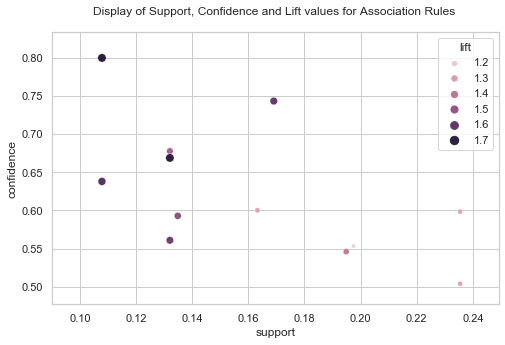

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x = rules['support'], y = rules['confidence'], hue = rules['lift'], size = rules['lift'])
plt.title('Display of Support, Confidence and Lift values for Association Rules \n')

plt.show()

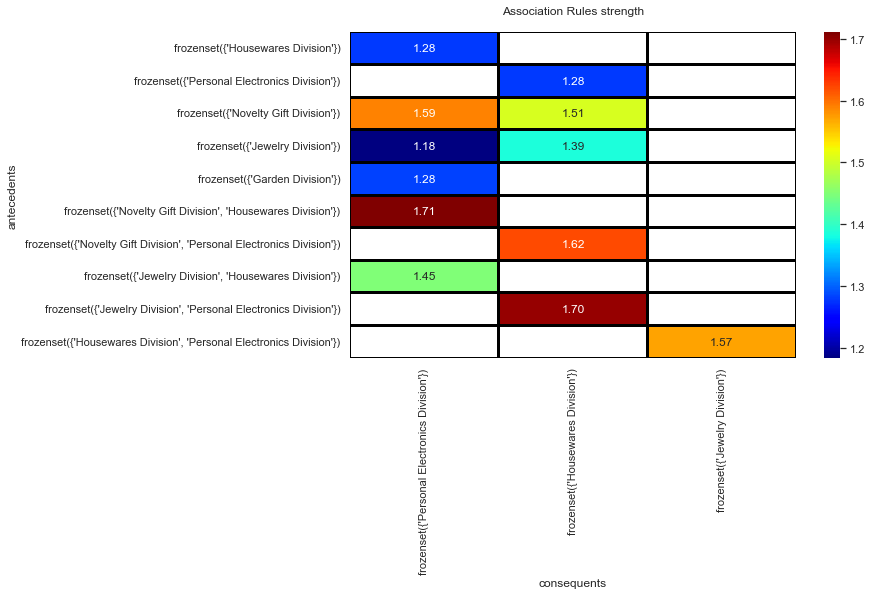

In [44]:
pivot2 = rules.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pivot2, annot = True, fmt = '.2f', linewidths = 2, linecolor = 'black', cmap = 'jet')
plt.title('Association Rules strength\n')
plt.show()

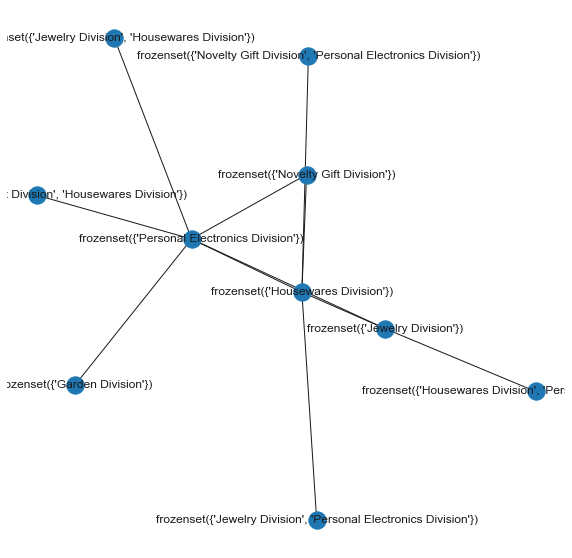

In [46]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

__Personal Electronics Division  and Housewares Division are common with any other catalog__